## Imports

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts")
from Plotting import Plotter
from label import label

In [16]:
import logging
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.INFO)

## Load Dataset

In [17]:
try:
    df = pd.read_csv('../data/data.csv')
except FileNotFoundError:
    print("csv file was not Found")
    logging.error("csv file was not Found")

## Exploration

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [20]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [21]:
df = df.drop('Unnamed: 32', axis = 1)

## Visualization

In [22]:
vis =  Plotter()

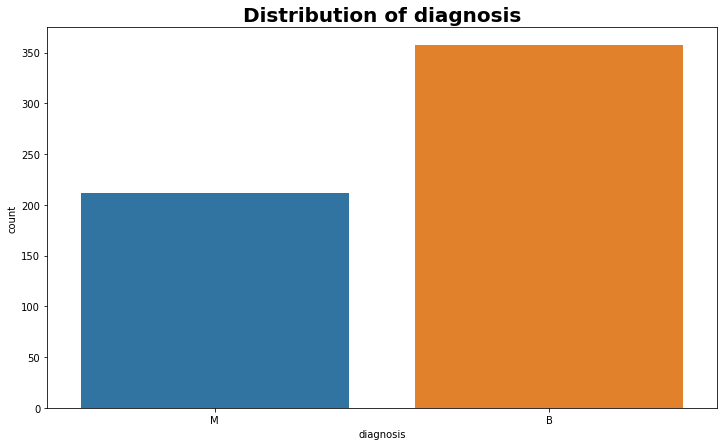

2021-08-28 22:45:34,218 plotted count plot for column diagnosis


In [23]:
vis.plot_count(df, 'diagnosis')
#plt.show()

<Figure size 864x504 with 0 Axes>

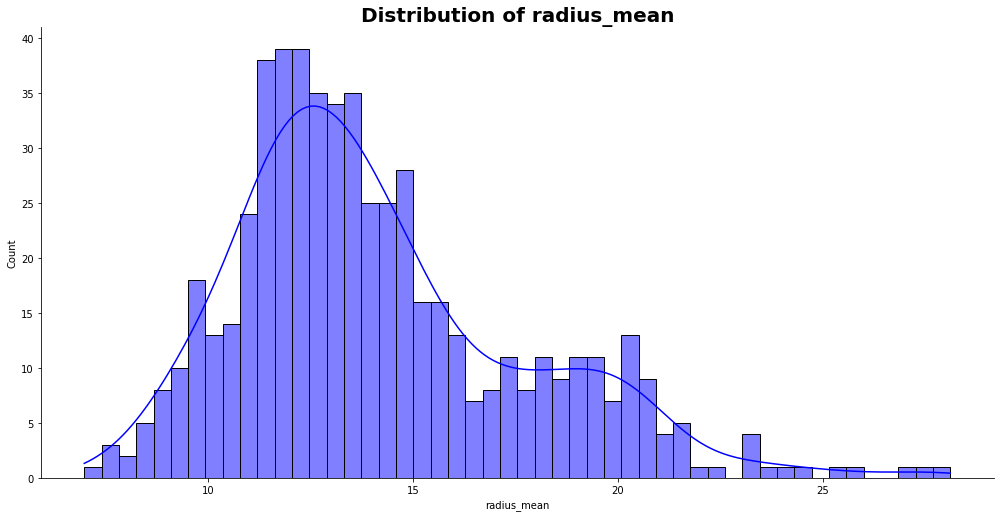

2021-08-28 22:45:34,781 plotted histogram for column radius_mean


In [24]:
vis.plot_hist(df, 'radius_mean', 'blue')

<Figure size 864x504 with 0 Axes>

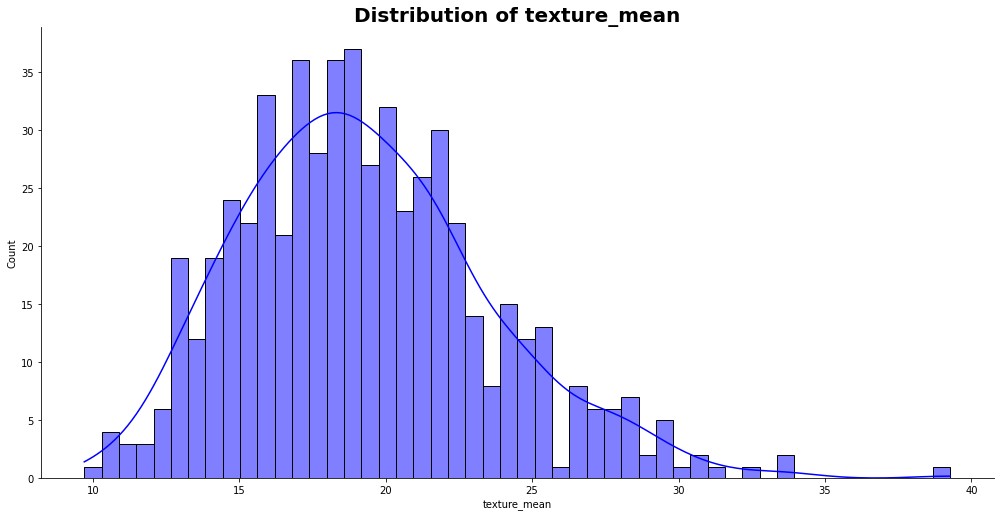

2021-08-28 22:45:35,287 plotted histogram for column texture_mean


In [25]:
vis.plot_hist(df, 'texture_mean', 'blue')

## Correlation

2021-08-28 22:45:35,545 plotted correlation matrix


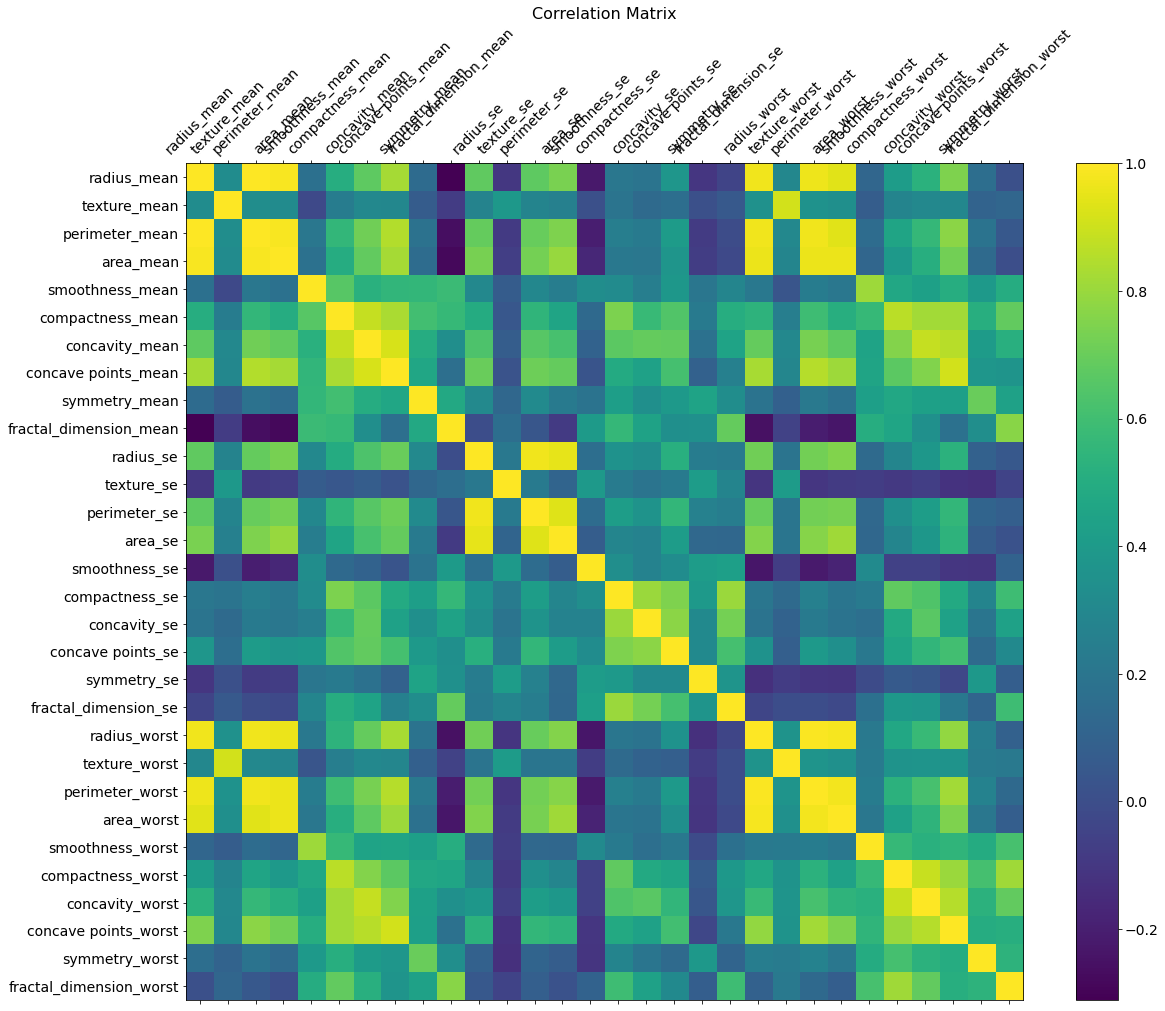

In [26]:
vis.plot_correlation(df.drop('id', axis = 1), "Correlation Matrix")

## Labeling

In [27]:
df['diagnosis'] = df['diagnosis'].apply(label)

In [28]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
df[['id', 'diagnosis']].groupby('diagnosis').count()

,id
diagnosis,
0,357
1,212


## Prepare Training Set

In [30]:
X, y = df.drop(['id', 'diagnosis'], axis = 1), df['diagnosis']

## Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(569, 30)

## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

## Logistic Regression Classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
log_reg = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
log_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

In [20]:
log_reg.score(X_train, y_train)

0.990234375

In [21]:
log_reg.score(X_test, y_test)

0.9649122807017544

### Feature Importance

<AxesSubplot:>

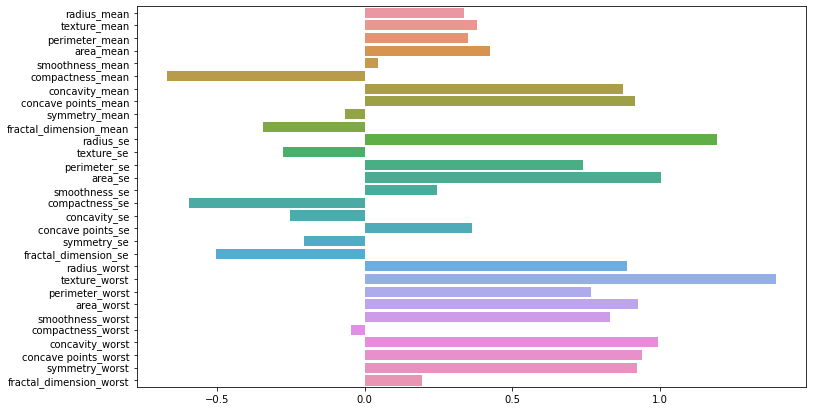

In [22]:
plt.figure(figsize=(12,7))
sns.barplot(y = df.drop(['id', 'diagnosis'], axis = 1).columns, x = log_reg[-1].coef_[0])

## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=3, random_state=0))
rand_forest.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, random_state=0))])

In [25]:
rand_forest.score(X_train, y_train)

0.984375

In [26]:
rand_forest.score(X_test, y_test)

0.9473684210526315

### Feature Importance

<AxesSubplot:>

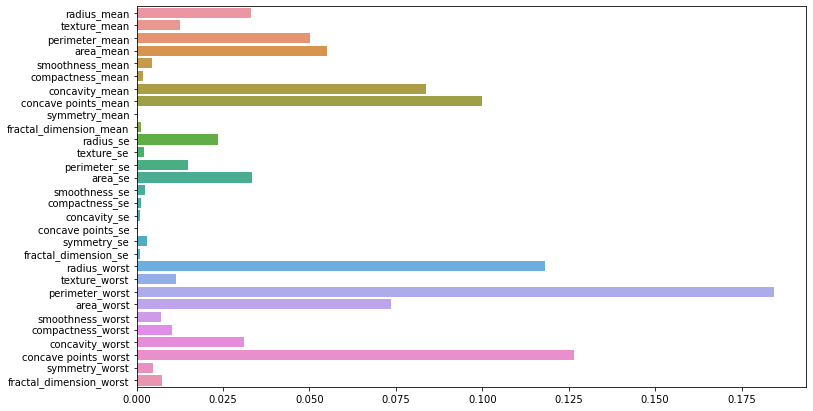

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(y = df.drop(['id', 'diagnosis'], axis = 1).columns, x = rand_forest[-1].feature_importances_)

## SVM

In [28]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear'))])

In [29]:
clf.score(X_train, y_train)

0.98828125

In [30]:
clf.score(X_test, y_test)

0.9649122807017544

### Feature Importance

<AxesSubplot:>

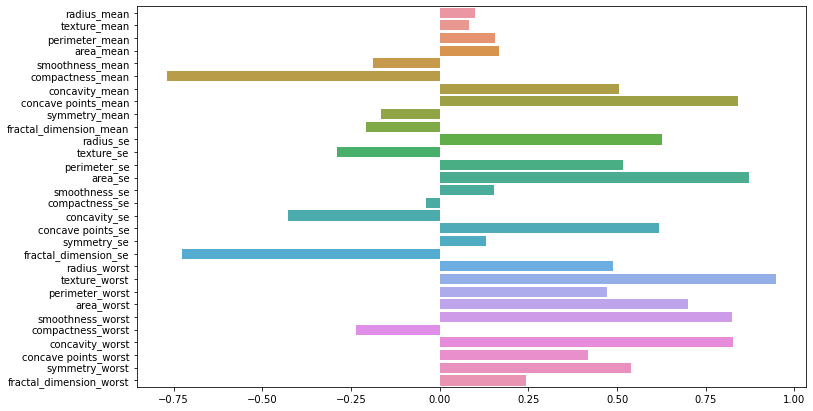

In [31]:
plt.figure(figsize=(12,7))
sns.barplot(y = df.drop(['id', 'diagnosis'], axis = 1).columns, x = clf[-1].coef_[0])

## ANN

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [33]:
model = Sequential()
model.add(Dense(12, input_dim = X_train.shape[-1], activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=20, batch_size=10)

Epoch 1/20
52/52 [==============================] - 5s 23ms/step - loss: 0.5952 - accuracy: 0.7227 - val_loss: 0.4374 - val_accuracy: 0.8421
Epoch 2/20
52/52 [==============================] - 0s 6ms/step - loss: 0.4496 - accuracy: 0.7949 - val_loss: 0.3109 - val_accuracy: 0.9298
Epoch 3/20
52/52 [==============================] - 0s 7ms/step - loss: 0.3552 - accuracy: 0.8496 - val_loss: 0.2316 - val_accuracy: 0.9298
Epoch 4/20
52/52 [==============================] - 0s 7ms/step - loss: 0.2889 - accuracy: 0.8828 - val_loss: 0.1870 - val_accuracy: 0.9298
Epoch 5/20
52/52 [==============================] - 0s 7ms/step - loss: 0.2496 - accuracy: 0.9141 - val_loss: 0.1614 - val_accuracy: 0.9123
Epoch 6/20
52/52 [==============================] - ETA: 0s - loss: 0.2337 - accuracy: 0.90 - 0s 7ms/step - loss: 0.2275 - accuracy: 0.9062 - val_loss: 0.1453 - val_accuracy: 0.9123
Epoch 7/20
52/52 [==============================] - 0s 6ms/step - loss: 0.1994 - accuracy: 0.9238 - val_loss: 0.1357 

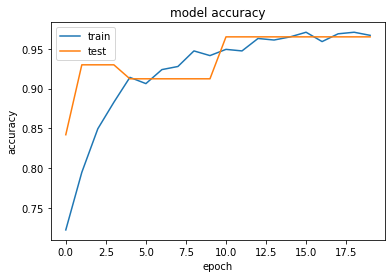

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# II. Causal Model

In [33]:
from causalnex.structure.notears import from_pandas
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

## 2. Create a causal graph using all training data and get the insights (this will be considered the ground truth)

In [69]:
train_df = pd.DataFrame(X_train, columns = df.drop(['id', 'diagnosis'], axis = 1).columns)
train_df['diagnosis'] = list(y_train)
test_df = pd.DataFrame(X_test, columns = df.drop(['id', 'diagnosis'], axis = 1).columns)
test_df['diagnosis'] = list(y_test)

from sklearn.utils import shuffle
train_df = shuffle(train_df)
test_df = shuffle(test_df)
##=============================SIZE DECREASED================================
# train_df = train_df.dropna().sample(10)
# test_df = test_df.dropna().sample(10)
##=============================SIZE DECREASED================================
train_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
35,0.100174,0.505055,0.093953,-0.019024,-0.136658,-0.092312,0.396746,0.011887,0.961590,-0.912598,...,0.581805,0.033920,-0.126013,-0.077528,-0.360469,0.300860,0.120195,0.192911,-0.858159,1
160,-1.264230,-1.431064,-1.147107,-1.087554,2.073741,2.199490,0.376658,0.553561,0.895873,4.671344,...,-1.243674,-1.125643,-0.971217,2.990984,0.712699,0.091688,-0.108204,-0.085347,2.906791,0
32,0.716485,0.486439,0.742699,0.710203,1.120124,0.783815,0.799760,1.103489,0.669515,0.071219,...,0.957974,2.077228,2.345788,2.109883,0.658627,0.946607,1.444909,1.152255,0.648043,1
262,-0.766069,-0.907474,-0.778867,-0.725500,0.002115,-0.671849,-0.675072,-0.520243,-0.283381,-0.587967,...,-0.595556,-0.814083,-0.735833,-0.586024,-0.569123,-0.634657,-0.454456,-0.363605,-0.903046,0
507,0.838611,1.829157,0.792127,0.785003,0.186433,0.126198,0.149413,0.396991,-0.067976,0.001756,...,1.435106,1.335561,1.349052,1.211247,-0.062755,-0.039764,0.622673,0.176733,0.368747,1


In [35]:
sm = from_pandas(train_df.sample(200), w_threshold = 0.7, max_iter=4)

2021-08-28 22:45:58,712 Learning structure using 'NOTEARS' optimisation.
C:\Users\HP\Anaconda3\envs\causalnex\lib\site-packages\causalnex\structure\notears.py:440: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


C:\Users\HP\Anaconda3\envs\causalnex\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\Users\HP\Anaconda3\envs\causalnex\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


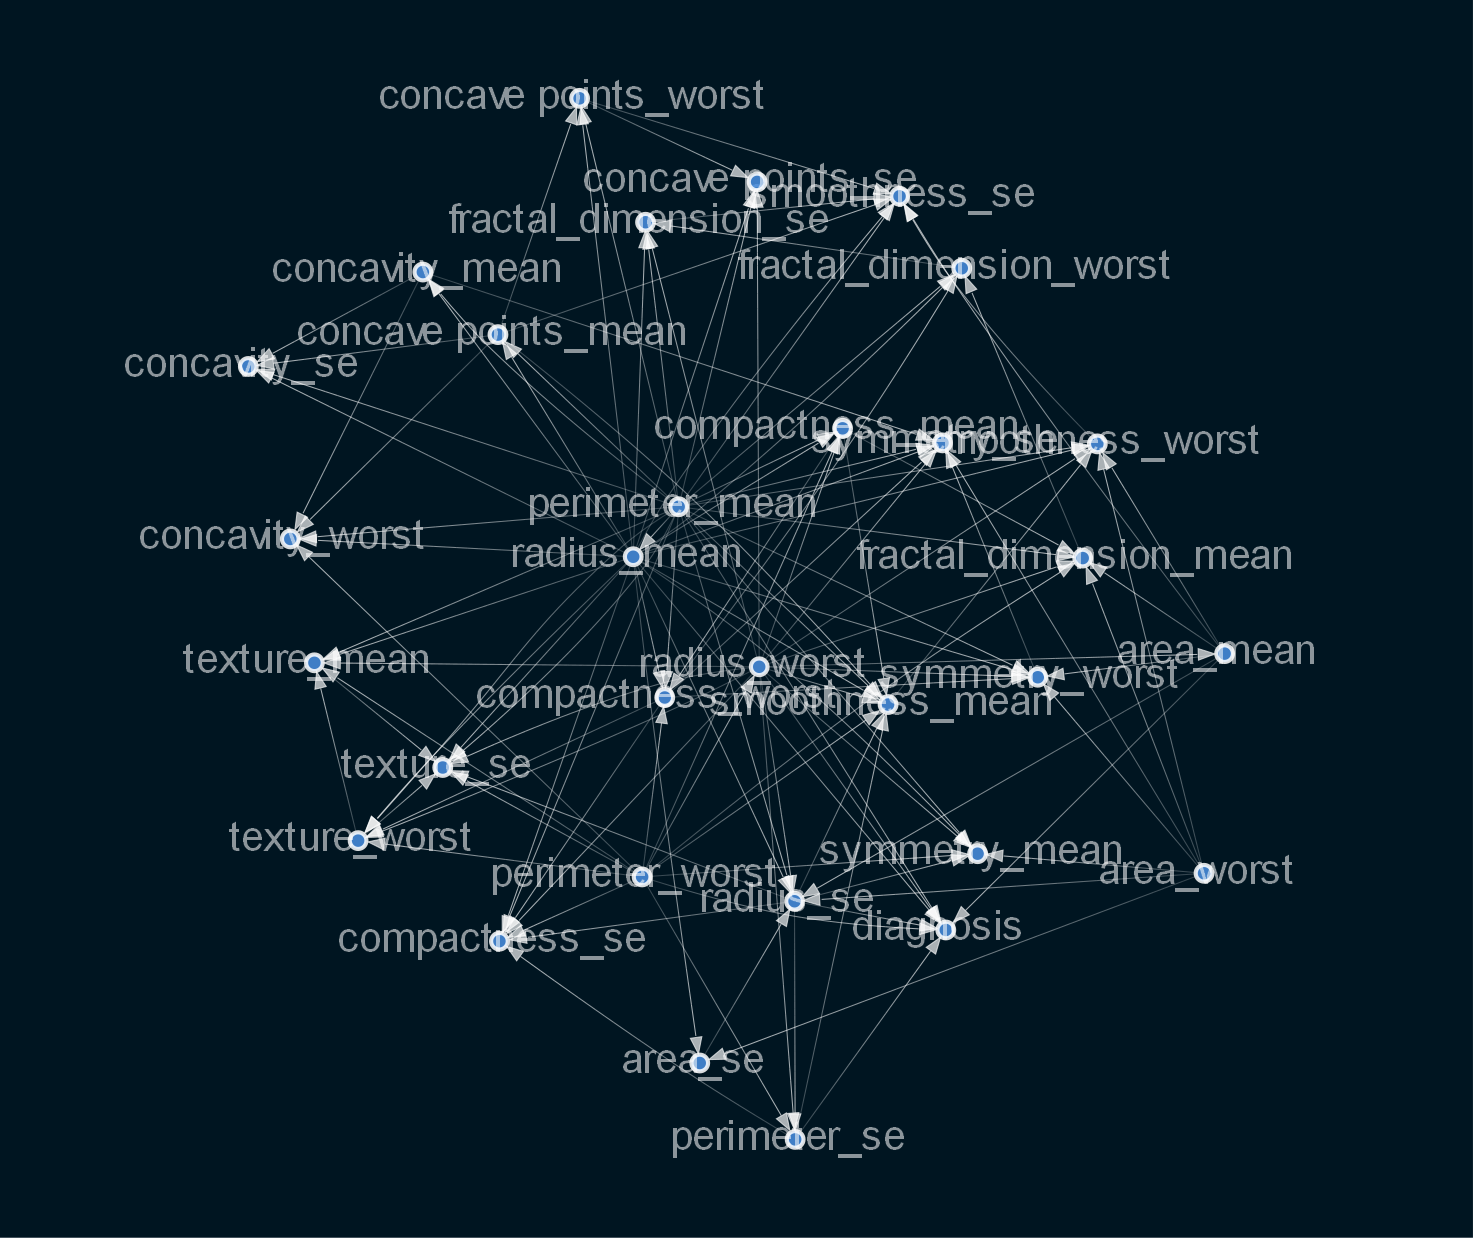

In [36]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## 3. Create new causal graphs using increasing fractions of the data and compare with the ground truth graph
The comparison can be done with a Jaccard Similarity Index, measuring the intersection and union of the graph edges


In [37]:
sm_v2 = from_pandas(train_df.sample(100), w_threshold = 0.7, max_iter=2)

2021-08-28 22:48:01,673 Learning structure using 'NOTEARS' optimisation.


C:\Users\HP\Anaconda3\envs\causalnex\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\Users\HP\Anaconda3\envs\causalnex\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


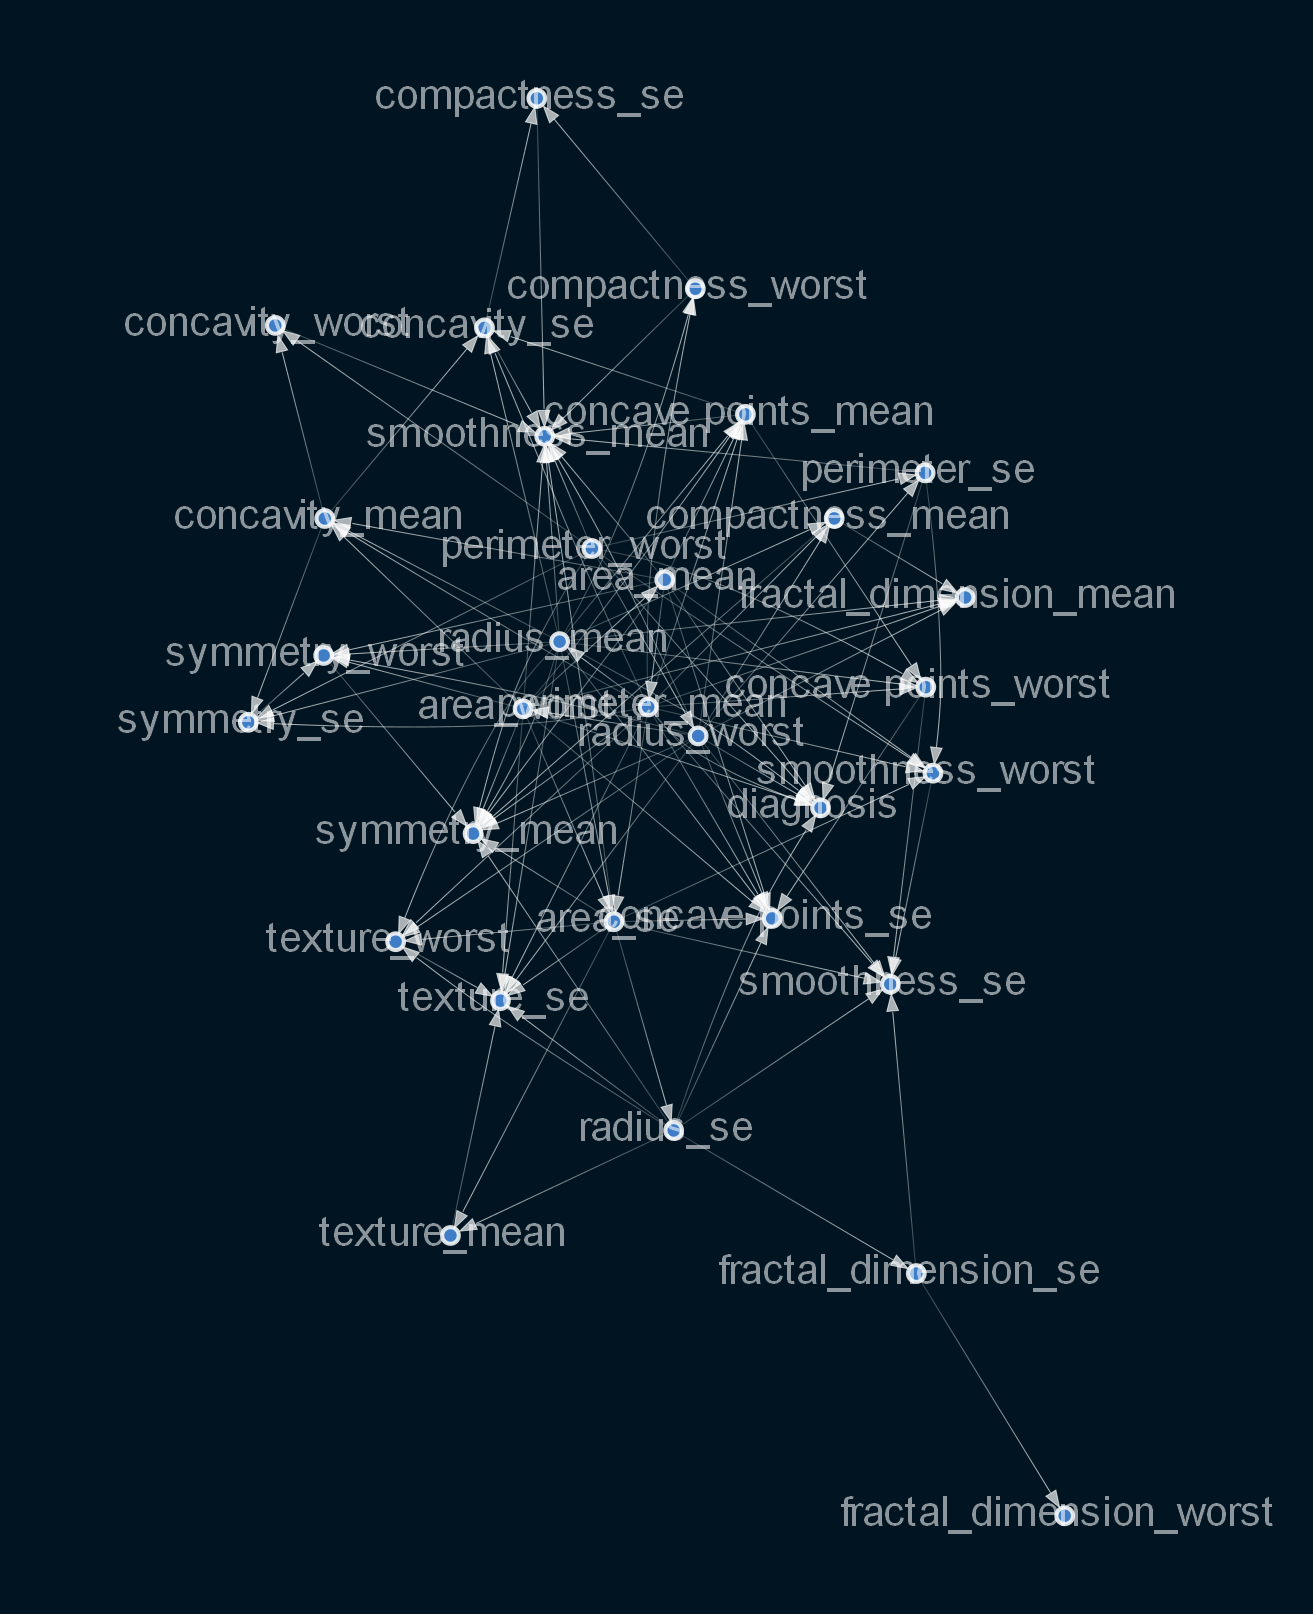

In [38]:
viz_2 = plot_structure(
    sm_v2,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz_2.draw(format='png'))

In [39]:
#sm.edges

### Compute Jaccard Similarity

In [40]:
def jaccard(g1, g2):
    s1, s2 = set(g1), set(g2)
    return len(s1.intersection(s2))/len(s1.union(s2))
jaccard([(1,2),(2,1)],[(1,2)])

0.5

In [42]:
jaccard(sm.edges, sm_v2.edges)

0.4327485380116959

## 4. After reaching a stable causal graph, select only variables that point directly to the target variable

In [70]:
ground_truth_predecessors = list(sm.predecessors('diagnosis'))
train_df_alt = train_df[ground_truth_predecessors+['diagnosis']]
test_df_alt = test_df[ground_truth_predecessors+['diagnosis']]
train_df_alt.head()

,radius_mean,perimeter_mean,area_mean,radius_se,perimeter_se,radius_worst,perimeter_worst,diagnosis
35,0.100174,0.093953,-0.019024,0.054961,0.215309,-0.012257,0.033920,1
160,-1.264230,-1.147107,-1.087554,-0.471984,-0.534167,-1.173990,-1.125643,0
32,0.716485,0.742699,0.710203,1.449560,1.281605,2.110339,2.077228,1
262,-0.766069,-0.778867,-0.725500,-0.827491,-0.852967,-0.817808,-0.814083,0
507,0.838611,0.792127,0.785003,1.890966,1.576643,1.385550,1.335561,1


## 5. Train one model using all variables and another using only the variables selected by the graph

In [44]:
sm_alt = from_pandas(train_df_alt, w_threshold = 0.7, max_iter=5)

2021-08-28 22:48:53,999 Learning structure using 'NOTEARS' optimisation.
C:\Users\HP\Anaconda3\envs\causalnex\lib\site-packages\causalnex\structure\notears.py:440: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


C:\Users\HP\Anaconda3\envs\causalnex\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
C:\Users\HP\Anaconda3\envs\causalnex\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


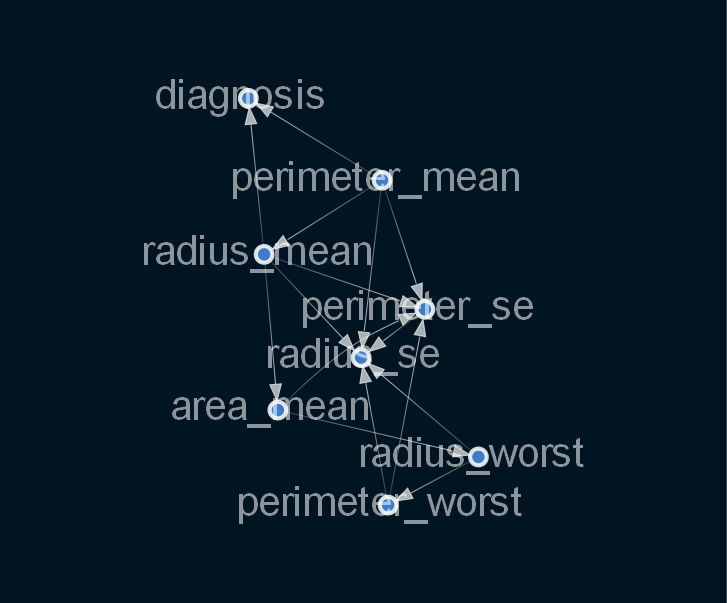

In [45]:
viz_alt = plot_structure(
    sm_alt,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz_alt.draw(format='png'))

## 6. Measure how much each of the models overfit the hold-out set created in step 1.

In [46]:
from causalnex.network import BayesianNetwork
bn_gt = BayesianNetwork(sm)
bn_alt = BayesianNetwork(sm_alt)

In [71]:
def descretize(df, n_rank):
    for col in df.columns[:-1]:
        df[col] = pd.qcut(df[col], n_rank, labels = False)
    return df
train_df = descretize(train_df, 4)
test_df = descretize(test_df, 4)
train_df_alt = train_df[ground_truth_predecessors+['diagnosis']]
test_df_alt = test_df[ground_truth_predecessors+['diagnosis']]
test_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
39,0,1,0,0,0,0,0,0,1,2,...,1,0,0,1,0,0,0,2,1,0
34,1,1,1,1,1,1,1,1,0,1,...,2,1,1,1,2,1,2,2,1,0
11,0,2,0,0,3,0,0,0,3,3,...,1,0,0,2,0,0,0,2,2,0
40,1,1,1,1,3,2,1,2,2,2,...,1,1,1,3,1,1,1,2,1,0
24,2,3,2,2,2,2,3,2,2,1,...,3,2,2,2,2,3,2,1,2,1


### For Ground Truth

In [72]:
bn_gt = bn_gt.fit_node_states(train_df.head(20))
bn_gt = bn_gt.fit_cpds(train_df.head(20), method="BayesianEstimator", bayes_prior="K2")
bn_gt.cpds["diagnosis"]

2021-08-28 23:01:13,436 Replacing existing CPD for radius_mean
2021-08-28 23:01:13,436 Replacing existing CPD for texture_mean
2021-08-28 23:01:13,436 Replacing existing CPD for smoothness_mean
2021-08-28 23:01:13,436 Replacing existing CPD for compactness_mean
2021-08-28 23:01:13,453 Replacing existing CPD for concavity_mean
2021-08-28 23:01:13,454 Replacing existing CPD for concave points_mean
2021-08-28 23:01:13,456 Replacing existing CPD for symmetry_mean
2021-08-28 23:01:13,456 Replacing existing CPD for radius_se
2021-08-28 23:01:13,458 Replacing existing CPD for texture_se
2021-08-28 23:01:13,459 Replacing existing CPD for area_se
2021-08-28 23:01:13,460 Replacing existing CPD for smoothness_se
2021-08-28 23:01:13,461 Replacing existing CPD for compactness_se
2021-08-28 23:01:13,462 Replacing existing CPD for concavity_se
2021-08-28 23:01:13,463 Replacing existing CPD for concave points_se
2021-08-28 23:01:13,465 Replacing existing CPD for symmetry_se
2021-08-28 23:01:13,466 Rep

area_mean          0                                               ...    3  \
perimeter_mean     0                                               ...    3   
perimeter_se       0                                               ...    3   
perimeter_worst    0                                               ...    3   
radius_mean        0                                               ...    3   
radius_se          0                   1                   2       ...    1   
radius_worst       0    1    2    3    0    1    2    3    0    1  ...    2   
diagnosis                                                          ...        
0                0.8  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   
1                0.2  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  ...  0.5   

area_mean                                                     
perimeter_mean                                                
perimeter_se                                                  
perimeter_worst                                               
radius_mean                                                   
radius_se               2                   3                 
radius_worst       3    0    1    2    3    0    1    2    3  
diagnosis                                                     
0                0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.2  
1                0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.8  

[2 rows x 16384 columns]

In [80]:
from causalnex.evaluation import classification_report
classification_report(bn_gt, test_df, "diagnosis")

{'diagnosis_0': {'precision': 0.8222222222222222,
  'recall': 0.9487179487179487,
  'f1-score': 0.8809523809523809,
  'support': 39},
 'diagnosis_1': {'precision': 0.8333333333333334,
  'recall': 0.5555555555555556,
  'f1-score': 0.6666666666666667,
  'support': 18},
 'accuracy': 0.8245614035087719,
 'macro avg': {'precision': 0.8277777777777777,
  'recall': 0.7521367521367521,
  'f1-score': 0.7738095238095238,
  'support': 57},
 'weighted avg': {'precision': 0.8257309941520468,
  'recall': 0.8245614035087719,
  'f1-score': 0.81328320802005,
  'support': 57}}

### For Alternate

In [77]:
bn_alt = bn_alt.fit_node_states(train_df_alt.head(50))
bn_alt = bn_alt.fit_cpds(train_df_alt.head(50), method="BayesianEstimator", bayes_prior="K2")
bn_alt.cpds["diagnosis"]

2021-08-28 23:02:44,646 Replacing existing CPD for radius_mean
2021-08-28 23:02:44,646 Replacing existing CPD for area_mean
2021-08-28 23:02:44,646 Replacing existing CPD for radius_se
2021-08-28 23:02:44,646 Replacing existing CPD for perimeter_se
2021-08-28 23:02:44,646 Replacing existing CPD for diagnosis
2021-08-28 23:02:44,651 Replacing existing CPD for perimeter_mean
2021-08-28 23:02:44,652 Replacing existing CPD for radius_worst
2021-08-28 23:02:44,653 Replacing existing CPD for perimeter_worst


perimeter_mean         0                   1                        2       \
radius_mean            0    1    2    3    0         1    2    3    0    1   
diagnosis                                                                    
0               0.928571  0.5  0.5  0.5  0.5  0.894737  0.5  0.5  0.5  0.5   
1               0.071429  0.5  0.5  0.5  0.5  0.105263  0.5  0.5  0.5  0.5   

perimeter_mean                   3                      
radius_mean            2    3    0    1    2         3  
diagnosis                                               
0               0.333333  0.5  0.5  0.5  0.5  0.071429  
1               0.666667  0.5  0.5  0.5  0.5  0.928571

In [79]:
from causalnex.evaluation import classification_report
classification_report(bn_alt, test_df_alt, "diagnosis")

{'diagnosis_0': {'precision': 0.9354838709677419,
  'recall': 0.7435897435897436,
  'f1-score': 0.8285714285714285,
  'support': 39},
 'diagnosis_1': {'precision': 0.6153846153846154,
  'recall': 0.8888888888888888,
  'f1-score': 0.7272727272727274,
  'support': 18},
 'accuracy': 0.7894736842105263,
 'macro avg': {'precision': 0.7754342431761787,
  'recall': 0.8162393162393162,
  'f1-score': 0.7779220779220779,
  'support': 57},
 'weighted avg': {'precision': 0.8343998955204389,
  'recall': 0.7894736842105263,
  'f1-score': 0.7965823650034176,
  'support': 57}}